# Predição do Valor de Venda de Casas Utilizando Modelos Lineares e Polinomiais Com Técnicas de Regularização e Transformação Box-Cox

### Desenvolvido por: Fernanda Paula Rocha

---

## Introdução

A aquisição ou venda de propriedades residenciais é uma decisão de grande relevância na vida das pessoas, envolvendo considerações financeiras e emocionais. Com o intuito de oferecer uma abordagem mais informada nesse processo, este projeto se propõe a desenvolver um modelo de predição do valor de venda de casas. Utilizando técnicas avançadas de aprendizado de máquina, busca-se explorar padrões e relações nos dados disponíveis, a fim de oferecer estimativas precisas e confiáveis.  O projeto busca não apenas construir um modelo preciso, mas também compreender os fatores mais influentes na determinação do valor de venda das casas.


## Descrição do Conjunto de Dados

O conjunto de dados fornecido contém uma série de variáveis que descrevem características importantes das residências. A seguir, apresentamos as principais variáveis presentes:

- **id:** Identificação única da propriedade (tipo inteiro - int64).
- **date:** Data de venda da casa (tipo objeto - object).
- **price:** Preço de venda da casa (tipo float64).
- **bedrooms:** Número de quartos na casa (tipo inteiro - int64).
- **bathrooms:** Número de banheiros na casa (tipo float64).
- **sqft_living:** Área útil da casa em pés quadrados (tipo inteiro - int64).
- **sqft_lot:** Área total do lote em pés quadrados (tipo inteiro - int64).
- **floors:** Número de andares na casa (tipo float64).
- **waterfront:** Indicador se a casa possui vista para a água (tipo inteiro - int64).
- **view:** Índice de visualizações da casa (tipo inteiro - int64).
- **condition:** Condição geral da casa, avaliada em uma escala de 1 a 5 (tipo inteiro - int64).
- **grade:** Avaliação geral da casa, com base no sistema de classificação do condado (tipo inteiro - int64).
- **sqft_above:** Área total acima do solo em pés quadrados (tipo float64).
- **sqft_basement:** Área do porão em pés quadrados (tipo inteiro - int64).
- **yr_built:** Ano de construção da casa (tipo inteiro - int64).
- **yr_renovated:** Ano de renovação da casa (tipo inteiro - int64).
- **zipcode:** Código postal da localização da casa (tipo inteiro - int64).
- **lat:** Latitude da localização da casa (tipo float64).
- **long:** Longitude da localização da casa (tipo float64).
- **sqft_living15:** Área útil média das 15 casas mais próximas em pés quadrados (tipo inteiro - int64).
- **sqft_lot15:** Área total média dos lotes das 15 casas mais próximas em pés quadrados (tipo inteiro - int64).


## Técnicas Utilizadas

Ao longo do projeto, serão empregadas as seguintes técnicas:

1. **Regressão Simples:** Inicialmente, será aplicada a regressão simples para compreender as relações lineares entre variáveis independentes e a variável resposta (preço de venda).

2. **Regressão Múltipla:** Ampliando a análise, a regressão múltipla será utilizada para considerar o efeito simultâneo de várias variáveis independentes na predição do preço de venda.

3. **Seleção de Variáveis para Regressão Múltipla:** Será realizada uma análise criteriosa para selecionar as variáveis mais relevantes, para tentar aprimorar eficiência do modelo.

4. **Transformação da Variável Resposta com Box-Cox:** Para lidar com possíveis desafios relacionados à distribuição da variável resposta, a técnica de transformação de Box-Cox será aplicada.

5. **Técnicas de Regularização:** Serão exploradas técnicas de regularização, como Lasso e Ridge, para evitar *overfitting* e tentar melhorar a generalização do modelo.

6. **Regularização com Polinômios:** Além das técnicas tradicionais, será considerada a aplicação de regularização em modelos polinomiais, permitindo uma representação mais flexível das relações entre variáveis.


## Objetivo do Projeto

O objetivo deste projeto é desenvolver um modelo de aprendizado de máquina capaz de predizer o valor de venda de casas com base em diversas variáveis preditoras, tais como número de quartos, número de banheiros, tamanho da sala, número de andares, entre outras. Através da análise de um conjunto de dados detalhado, pretende-se explorar padrões e relações que permitam estimar de forma confiável o preço de mercado de uma propriedade. O projeto abrange desde a análise exploratória dos dados até o desenvolvimento e avaliação do modelo, proporcionando *insights* valiosos para compradores e vendedores no mercado imobiliário.



# ----------------------------------------------------------------------
# Carregamento e Exploração Inicial dos Dados
# ----------------------------------------------------------------------

In [2]:
# --------------------------------------------------------------
# Importação de Bibliotecas
# --------------------------------------------------------------

import folium
import sklearn
import numpy as np
import pandas as pd 
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import linear_model
from sklearn.linear_model import Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from matplotlib import pyplot as plt
from matplotlib import pyplot
from pandas.core.frame import DataFrame
from mpl_toolkits.mplot3d import Axes3D
from folium.plugins import HeatMap
from statsmodels.formula.api import ols
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression
from sklearn.pipeline import make_pipeline


%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Versões das bibliotecas utilizadas:
# Pandas: 1.4.2
# NumPy: 1.22.3
# Matplotlib: 3.4.3
# folium: 0.14.0
# Sklearn: 1.1.3
# Seaborn: 0.12.1
# Statsmodels.api: 0.13.2

In [3]:
print("Versões das bibliotecas utilizadas:")
print("Pandas:", pd.__version__)
print("NumPy:", np.__version__)
print("Matplotlib:", plt.matplotlib.__version__)
print("folium:", folium.__version__)
print("Sklearn:", sklearn.__version__)
print("Seaborn:", sns.__version__)
print("Statsmodels.api:", sm.__version__)


Versões das bibliotecas utilizadas:
Pandas: 1.4.2
NumPy: 1.22.3
Matplotlib: 3.4.3
folium: 0.14.0
Sklearn: 1.1.3
Seaborn: 0.12.1
Statsmodels.api: 0.13.2


<!-- ## Aplicação


Suponha que desejamos predizer o valor de venda de uma casa utilizando variáveis preditoras como número de quartos, número de banheiros, tamanho da sala, número de andares, entre outras.

Fonte e alguns desenvolvimentos adicionais: ver https://www.kaggle.com/burhanykiyakoglu/predicting-house-prices -->

In [4]:
evaluation = pd.DataFrame({'Model': [],
                           'Details':[],
                           'Root Mean Squared Error (RMSE)':[],
                           'R-squared (training)':[],
                           'Adjusted R-squared (training)':[],
                           'R-squared (test)':[],
                           'Adjusted R-squared (test)':[],
                           '5-Fold Cross Validation':[]})

df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

Text(0.5, 1.0, 'Matriz de correlações de Pearson')

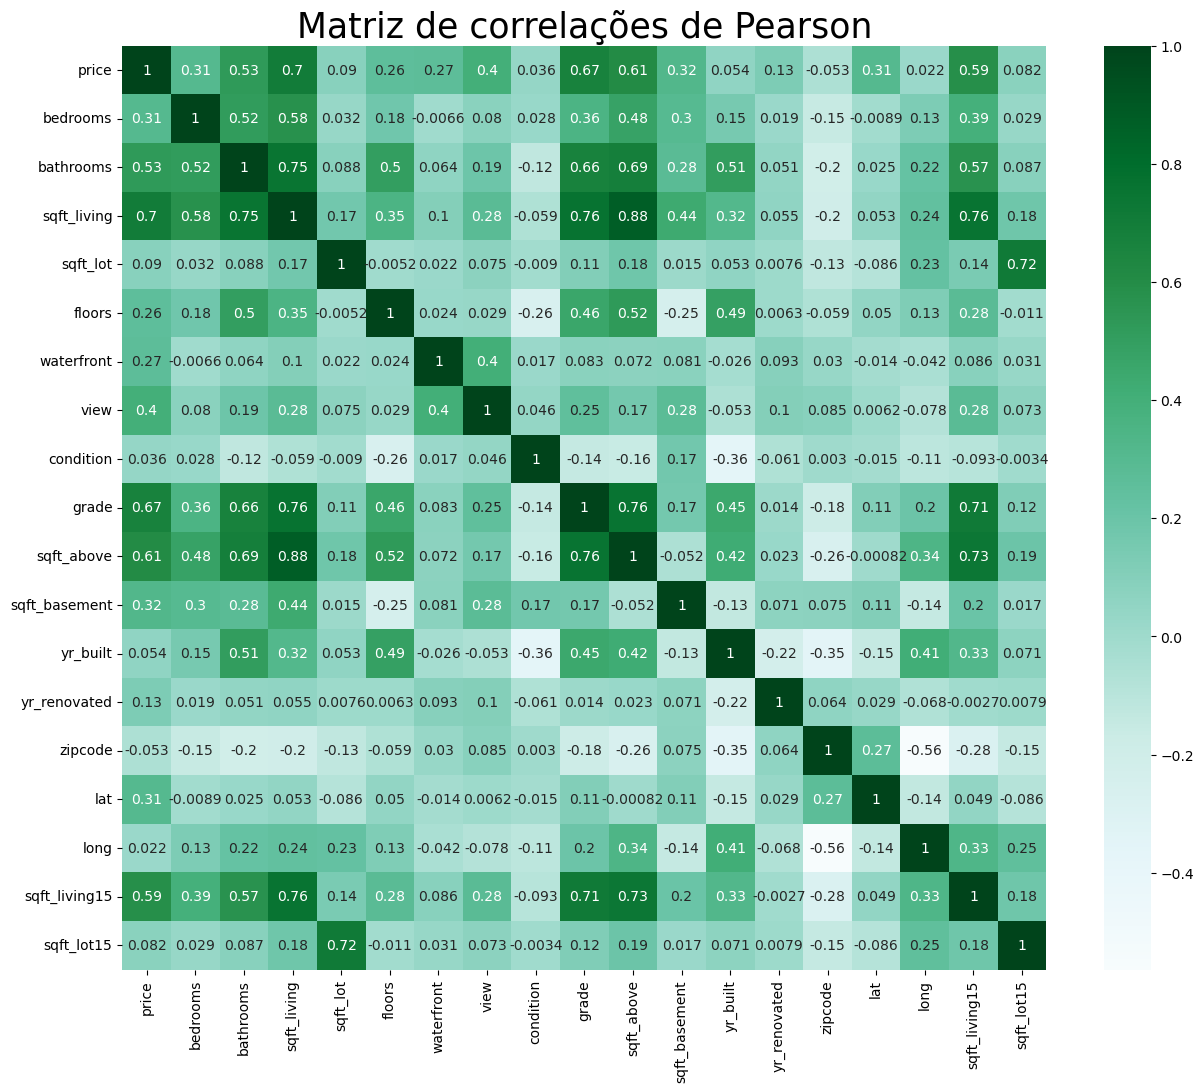

In [7]:
fig, ax = plt.subplots(figsize=(15,12))
sns.heatmap(df.drop(['id'], axis=1).corr(),annot=True, square=True, cmap="BuGn")

plt.title('Matriz de correlações de Pearson',fontsize=25)



In [8]:
missing_values = df.isnull().sum()

print('Valores nulos:', missing_values)

Valores nulos: id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


In [9]:
df = df.dropna()


### Normalizando as variáveis

In [91]:
# from sklearn.preprocessing import StandardScaler
# # Criar um StandardScaler
# scaler = StandardScaler()
# # Selecionar as variáveis a serem normalizadas
# df = df[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade']]

# # Ajustar e transformar os dados
# df = scaler.fit_transform(df)




In [92]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


## Modelo Linear Simples

In [93]:
mod = ols('price~sqft_living',data=df)
res = mod.fit()


Os resultados do  modelo de regressão simples indicam que o modelo explica cerca de 49.3% da variabilidade nos preços das casas, como indicado pelo valor R-quadrado de 0.493. O coeficiente para `sqft_living` é 280.6236, o que significa que, para cada aumento de uma unidade em `sqft_living`, o preço da casa aumenta em média em 280.6236 unidades monetárias, mantendo todas as outras variáveis constantes.

O valor p para `sqft_living` é menor que 0.05, indicando que `sqft_living` é um preditor significativo do preço da casa. O intercepto do modelo é - -4.358e+04, o que seria o valor previsto para `price` quando `sqft_living` é 0.

No entanto, o modelo tem um problema potencial de multicolinearidade ou outros problemas numéricos, como indicado pelo grande número de condições (5.63e+03). Isso pode afetar a precisão das estimativas dos coeficientes. Além disso, o teste Omnibus e o teste Jarque-Bera (JB) indicam que os resíduos não são normalmente distribuídos. Isso pode violar uma das suposições da regressão OLS e afetar a validade das estimativas do modelo. 

In [94]:
def adjustedR2(r2,n,k):
    return r2-(k-1)/(n-k)*(1-r2)

In [95]:
train_data,test_data = train_test_split(df,train_size = 0.8,random_state=3)

features = ['sqft_living']
complex_model_1 = linear_model.LinearRegression()
complex_model_1.fit(train_data[features],train_data['price'])

print('Intercept: {}'.format(complex_model_1.intercept_))
print('Coefficients: {}'.format(complex_model_1.coef_))

pred = complex_model_1.predict(test_data[features])
rmsecm = float(format(np.sqrt(metrics.mean_squared_error(test_data['price'],pred)),'.3f'))
rtrcm = float(format(complex_model_1.score(train_data[features],train_data['price']),'.3f'))

artrcm = float(format(adjustedR2(complex_model_1.score(train_data[features],train_data['price']),train_data.shape[0],len(features)),'.3f'))
rtecm = float(format(complex_model_1.score(test_data[features],test_data['price']),'.3f'))
artecm = float(format(adjustedR2(complex_model_1.score(test_data[features],test_data['price']),test_data.shape[0],len(features)),'.3f'))
cv = float(format(cross_val_score(complex_model_1,df[features],df['price'],cv=5).mean(),'.3f'))

r = evaluation.shape[0]
evaluation.loc[r] = ['Simple Linear Regression','-',rmsecm,rtrcm,artrcm,rtecm,artecm,cv]
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)

Intercept: -47235.811302901246
Coefficients: [282.2468152]


,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
0,Simple Linear Regression,-,254289.149,0.492,0.492,0.496,0.496,0.491


### Análise de resíduo

In [96]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.100e+04
Date:                Sun, 24 Dec 2023   Prob (F-statistic):               0.00
Time:                        18:39:14   Log-Likelihood:            -3.0027e+05
No. Observations:               21613   AIC:                         6.005e+05
Df Residuals:                   21611   BIC:                         6.006e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.358e+04   4402.690     -9.899      

In [97]:
# valores ajustados de E(Y)
ypred=res.fittedvalues

# resíduo=observado-ajustado
residuo = res.resid

# objeto para a análise de pontos influentes
infl = res.get_influence()

# diagonal da matriz hat
hii = infl.hat_matrix_diag

# resíduo studentizado (internamente)
res_stud = infl.resid_studentized_internal

# resíduo studentizado com i-ésima observação deletada (externamente)
res_stud_del = infl.resid_studentized_external

# DFFITS
(dffits,p) = infl.dffits

# Distância de Cook
(cook,p) = infl.cooks_distance

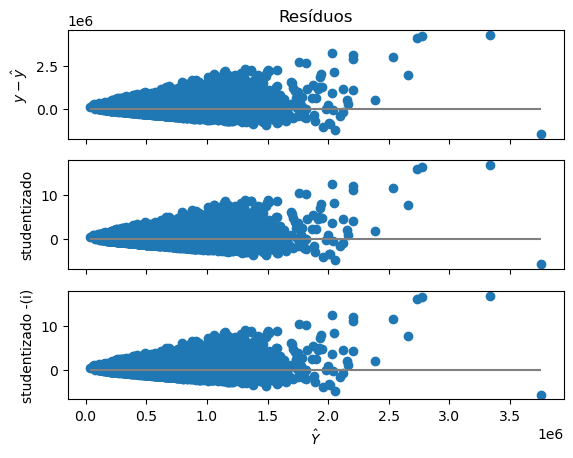

In [98]:
fig, (ax1, ax2, ax3) = plt.subplots(3)
ax1.scatter(ypred, residuo)
ax1.set_ylabel('$y-\hat{y}$')
ax1.set_title('Resíduos')
ax1.hlines(0,xmin=min(ypred),xmax=max(ypred),color='gray')
ax2.scatter(ypred, res_stud)
ax2.set_ylabel('studentizado')
ax2.hlines(0,xmin=min(ypred),xmax=max(ypred),color='gray')
ax3.scatter(ypred, res_stud_del)
ax3.set_ylabel('studentizado -(i)')
ax3.hlines(0,xmin=min(ypred),xmax=max(ypred),color='gray')
ax3.set_xlabel('$\hat{Y}$')

for ax in fig.get_axes():
    ax.label_outer()

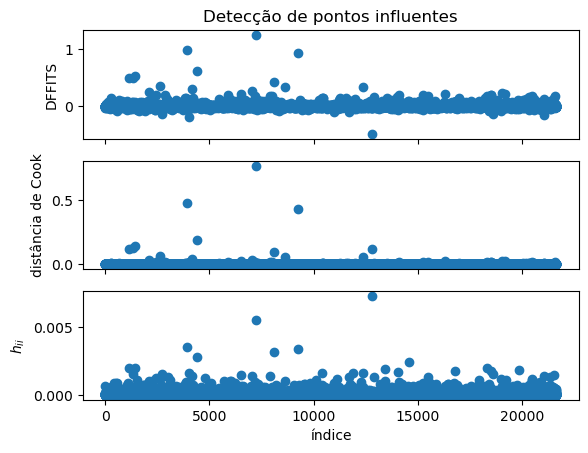

In [99]:
fig, (ax1, ax2, ax3) = plt.subplots(3)
ax1.scatter(df.index, dffits)
ax1.set_ylabel('DFFITS')
ax1.set_title('Detecção de pontos influentes')
#ax1.hlines(0,xmin=1,xmax=102,color='gray')

ax2.scatter(df.index, cook)
ax2.set_ylabel('distância de Cook')

ax3.scatter(df.index, hii)
ax3.set_ylabel('$h_{ii}$')
ax3.set_xlabel('índice')

for ax in fig.get_axes():
    ax.label_outer()

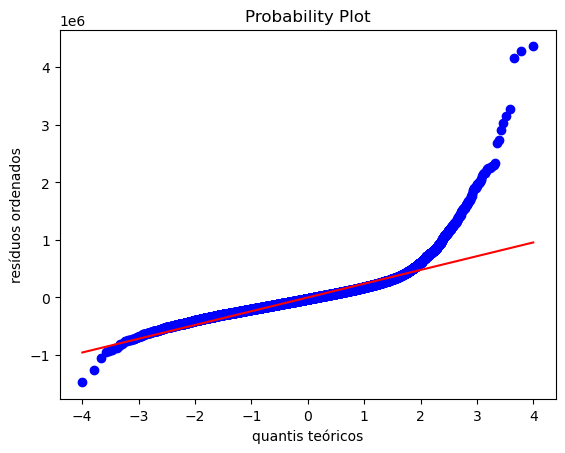

In [100]:
# Verificando a suposição de distribuição Normal dos resíduos
stats.probplot(residuo, plot=plt)
plt.xlabel('quantis teóricos')
plt.ylabel('resíduos ordenados')
plt.show()

Foi utilizada uma regressão linear simples e foi identificado um ajuste insatisfatório. Para aprimorar o modelo, pretende-se adicionar mais variáveis. Quando há mais de um recurso em uma regressão linear, a abordagem é definida como regressão múltipla. Assim, é hora de criar alguns modelos mais complexos.

## Modelo Linear Múltiplo Com Todas as Preditoras

In [102]:
X = df[['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','grade']].values

y = df['price'].values

In [103]:
modelo = ols('price ~ bedrooms + bathrooms + sqft_living + sqft_lot + floors + waterfront + view + condition + grade',data=df)

res = modelo.fit()


In [104]:
train_data,test_data = train_test_split(df,train_size = 0.8,random_state=3)

features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront', 'view', 'condition', 'grade']
complex_model_1 = linear_model.LinearRegression()
complex_model_1.fit(train_data[features],train_data['price'])

print('Intercept: {}'.format(complex_model_1.intercept_))
print('Coefficients: {}'.format(complex_model_1.coef_))

pred = complex_model_1.predict(test_data[features])
rmsecm = float(format(np.sqrt(metrics.mean_squared_error(test_data['price'],pred)),'.3f'))
rtrcm = float(format(complex_model_1.score(train_data[features],train_data['price']),'.3f'))

artrcm = float(format(adjustedR2(complex_model_1.score(train_data[features],train_data['price']),train_data.shape[0],len(features)),'.3f'))
rtecm = float(format(complex_model_1.score(test_data[features],test_data['price']),'.3f'))
artecm = float(format(adjustedR2(complex_model_1.score(test_data[features],test_data['price']),test_data.shape[0],len(features)),'.3f'))
cv = float(format(cross_val_score(complex_model_1,df[features],df['price'],cv=5).mean(),'.3f'))

r = evaluation.shape[0]
evaluation.loc[r] = ['Multiple Regression-1','All features',rmsecm,rtrcm,artrcm,rtecm,artecm,cv]
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)

Intercept: -682602.5354520959
Coefficients: [-3.37785908e+04 -1.09025075e+04  1.99448654e+02 -3.50854472e-01
 -1.48240739e+04  5.45051297e+05  6.50285793e+04  5.58998443e+04
  9.95878298e+04]


,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
1,Multiple Regression-1,All features,221680.867,0.602,0.602,0.617,0.616,0.601
0,Simple Linear Regression,-,254289.149,0.492,0.492,0.496,0.496,0.491


### Análise de resíduo

In [105]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.605
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     3673.
Date:                Sun, 24 Dec 2023   Prob (F-statistic):               0.00
Time:                        18:41:56   Log-Likelihood:            -2.9757e+05
No. Observations:               21613   AIC:                         5.952e+05
Df Residuals:                   21603   BIC:                         5.952e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -6.827e+05   1.73e+04    -39.509      

In [106]:
# valores ajustados de E(Y)
ypred=res.fittedvalues

# resíduo=observado-ajustado
residuo = res.resid

# objeto para a análise de pontos influentes
infl = res.get_influence()

# diagonal da matriz hat
hii = infl.hat_matrix_diag

# resíduo studentizado (internamente)
res_stud = infl.resid_studentized_internal

# resíduo studentizado com i-ésima observação deletada (externamente)
res_stud_del = infl.resid_studentized_external

# DFFITS
(dffits,p) = infl.dffits

# Distância de Cook
(cook,p) = infl.cooks_distance

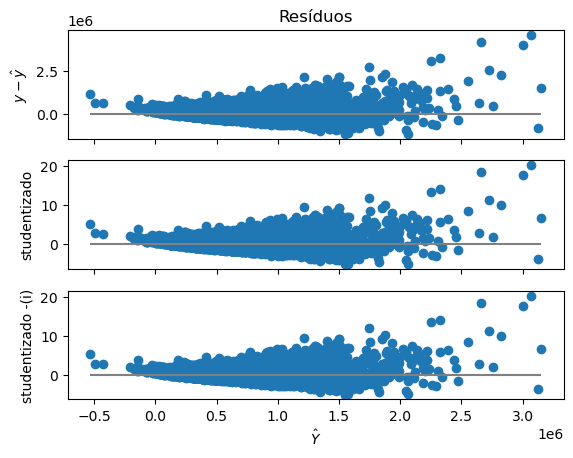

In [107]:
fig, (ax1, ax2, ax3) = plt.subplots(3)
ax1.scatter(ypred, residuo)
ax1.set_ylabel('$y-\hat{y}$')
ax1.set_title('Resíduos')
ax1.hlines(0,xmin=min(ypred),xmax=max(ypred),color='gray')
ax2.scatter(ypred, res_stud)
ax2.set_ylabel('studentizado')
ax2.hlines(0,xmin=min(ypred),xmax=max(ypred),color='gray')
ax3.scatter(ypred, res_stud_del)
ax3.set_ylabel('studentizado -(i)')
ax3.hlines(0,xmin=min(ypred),xmax=max(ypred),color='gray')
ax3.set_xlabel('$\hat{Y}$')

for ax in fig.get_axes():
    ax.label_outer()

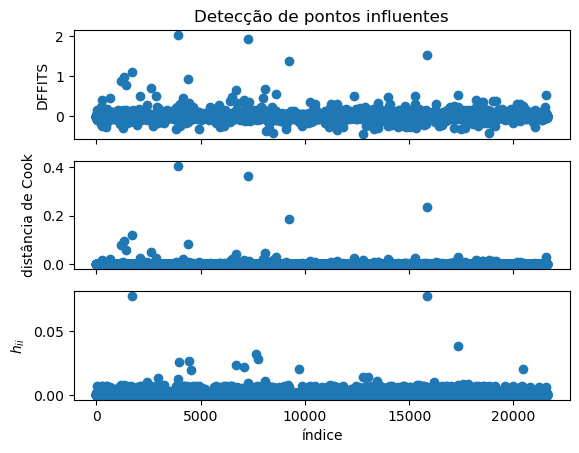

In [108]:
fig, (ax1, ax2, ax3) = plt.subplots(3)
ax1.scatter(df.index, dffits)
ax1.set_ylabel('DFFITS')
ax1.set_title('Detecção de pontos influentes')
#ax1.hlines(0,xmin=1,xmax=102,color='gray')

ax2.scatter(df.index, cook)
ax2.set_ylabel('distância de Cook')

ax3.scatter(df.index, hii)
ax3.set_ylabel('$h_{ii}$')
ax3.set_xlabel('índice')

for ax in fig.get_axes():
    ax.label_outer()

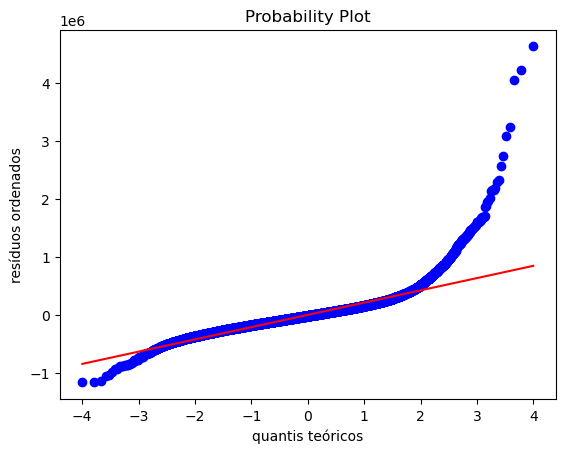

In [109]:
# Verificando a suposição de distribuição Normal dos resíduos
stats.probplot(residuo, plot=plt)
plt.xlabel('quantis teóricos')
plt.ylabel('resíduos ordenados')
plt.show()

Os resultados do modelo de regressão múltipla indicam que o modelo explica cerca de 60.5% da variabilidade nos preços das casas, como indicado pelo valor R-quadrado. Isso é um aumento em relação ao modelo de regressão simples, sugerindo que as variáveis adicionais estão contribuindo para a previsão do preço da casa.


- `bedrooms`: Para cada aumento de um quarto, o preço da casa diminui em média em 33.670 unidades monetárias, mantendo todas as outras variáveis constantes.
- `bathrooms`: Para cada aumento de um banheiro, o preço da casa diminui em média em 11.420 unidades monetárias, mantendo todas as outras variáveis constantes.
- `sqft_living`: Para cada aumento de uma unidade em `sqft_living`, o preço da casa aumenta em média em 196.3657 unidades monetárias, mantendo todas as outras variáveis constantes.
- `sqft_lot`: Para cada aumento de uma unidade em `sqft_lot`, o preço da casa diminui em média em 0.3462 unidades monetárias, mantendo todas as outras variáveis constantes.
- `floors`: Para cada aumento de um andar, o preço da casa diminui em média em 13.120 unidades monetárias, mantendo todas as outras variáveis constantes.
- `waterfront`: Casas à beira-mar são, em média, 578.300 unidades monetárias mais caras do que as que não são, mantendo todas as outras variáveis constantes.
- `view`: Para cada aumento de uma unidade na vista, o preço da casa aumenta em média em 63.270 unidades monetárias, mantendo todas as outras variáveis constantes.
- `condition`: Para cada aumento de uma unidade na condição, o preço da casa aumenta em média em 54.990 unidades monetárias, mantendo todas as outras variáveis constantes.
- `grade`: Para cada aumento de uma unidade, o preço da casa aumenta em média em 100.600 unidades monetárias, mantendo todas as outras variáveis constantes.

O intercepto do modelo é -682.700, o que seria o valor previsto para `price` quando todas as variáveis preditoras são 0.

No entanto, o modelo ainda tem um problema potencial de multicolinearidade ou outros problemas numéricos, como indicado pelo grande número de condições (5.59e+05). Isso pode afetar a precisão das estimativas dos coeficientes. 

Observe que no gráfico alguns pontos tendem a ser negativos. Os resíduos também estão aumentando, o que pode indicar um comportamento de heterocedasticidade. 

Agora, será atribuído ao modelo somente as variáveis mais importantes. 

### Regressão Múltipla com Seleção de Variáveis (feature selection)

In [110]:
X = df[['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','grade']]

y = df['price']


X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state = 1)

Feature 0: 0.071536
Feature 1: 0.207570
Feature 2: 0.351330
Feature 3: 0.062260
Feature 4: 0.075820
Feature 5: 0.015428
Feature 6: 0.056326
Feature 7: 0.013198
Feature 8: 0.335678


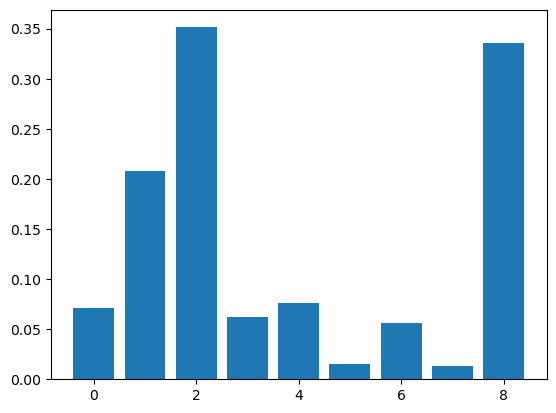

In [111]:
def select_features(X_treino, y_treino, X_teste):

    fs = SelectKBest(score_func=mutual_info_regression, k='all')

    fs.fit(X_treino, y_treino)

    X_treino_fs = fs.transform(X_treino)

    X_teste_fs = fs.transform(X_teste)
    return X_treino_fs, X_teste_fs, fs
 

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=1)

X_treino_fs, X_teste_fs, fs = select_features(X_treino, y_treino, X_teste)


for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))   

    
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()




In [112]:
train_data,test_data = train_test_split(df,train_size = 0.8,random_state=3)

features = ['sqft_living','grade']
complex_model_2 = linear_model.LinearRegression()
complex_model_2.fit(train_data[features],train_data['price'])

print('Intercept: {}'.format(complex_model_2.intercept_))
print('Coefficients: {}'.format(complex_model_2.coef_))

pred = complex_model_2.predict(test_data[features])
rmsecm = float(format(np.sqrt(metrics.mean_squared_error(test_data['price'],pred)),'.3f'))
rtrcm = float(format(complex_model_2.score(train_data[features],train_data['price']),'.3f'))

artrcm = float(format(adjustedR2(complex_model_2.score(train_data[features],train_data['price']),train_data.shape[0],len(features)),'.3f'))
rtecm = float(format(complex_model_2.score(test_data[features],test_data['price']),'.3f'))
artecm = float(format(adjustedR2(complex_model_2.score(test_data[features],test_data['price']),test_data.shape[0],len(features)),'.3f'))
cv = float(format(cross_val_score(complex_model_2,df[features],df['price'],cv=5).mean(),'.3f'))

r = evaluation.shape[0]
evaluation.loc[r] = ['Multiple Regression-2','selected features',rmsecm,rtrcm,artrcm,rtecm,artecm,cv]
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)

Intercept: -598022.8027257539
Coefficients: [  186.877963  97878.7708715]


,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
1,Multiple Regression-1,All features,221680.867,0.602,0.602,0.617,0.616,0.601
2,Multiple Regression-2,selected features,242366.385,0.533,0.533,0.542,0.542,0.533
0,Simple Linear Regression,-,254289.149,0.492,0.492,0.496,0.496,0.491


### Análise de resíduos

In [113]:
modelo = ols('price ~ sqft_living + grade',data=df)
res = modelo.fit()

# valores ajustados de E(Y)
ypred=res.fittedvalues

# resíduo=observado-ajustado
residuo = res.resid

# objeto para a análise de pontos influentes
infl = res.get_influence()

# diagonal da matriz hat
hii = infl.hat_matrix_diag

# resíduo studentizado (internamente)
res_stud = infl.resid_studentized_internal

# resíduo studentizado com i-ésima observação deletada (externamente)
res_stud_del = infl.resid_studentized_external

# DFFITS
(dffits,p) = infl.dffits

# Distância de Cook
(cook,p) = infl.cooks_distance

In [114]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                 1.241e+04
Date:                Sun, 24 Dec 2023   Prob (F-statistic):               0.00
Time:                        18:53:19   Log-Likelihood:            -2.9934e+05
No. Observations:               21613   AIC:                         5.987e+05
Df Residuals:                   21610   BIC:                         5.987e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -5.981e+05   1.33e+04    -44.978      

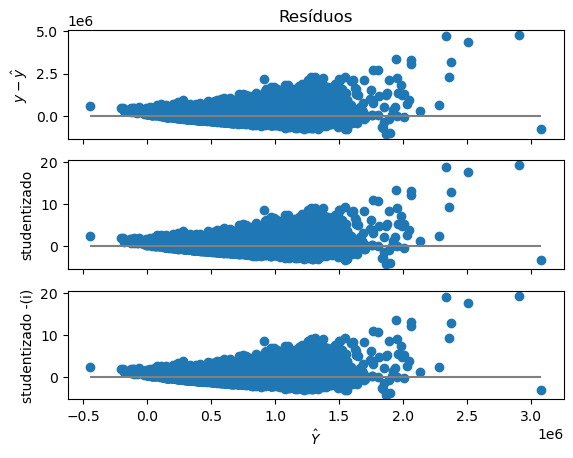

In [115]:
fig, (ax1, ax2, ax3) = plt.subplots(3)
ax1.scatter(ypred, residuo)
ax1.set_ylabel('$y-\hat{y}$')
ax1.set_title('Resíduos')
ax1.hlines(0,xmin=min(ypred),xmax=max(ypred),color='gray')
ax2.scatter(ypred, res_stud)
ax2.set_ylabel('studentizado')
ax2.hlines(0,xmin=min(ypred),xmax=max(ypred),color='gray')
ax3.scatter(ypred, res_stud_del)
ax3.set_ylabel('studentizado -(i)')
ax3.hlines(0,xmin=min(ypred),xmax=max(ypred),color='gray')
ax3.set_xlabel('$\hat{Y}$')

for ax in fig.get_axes():
    ax.label_outer()

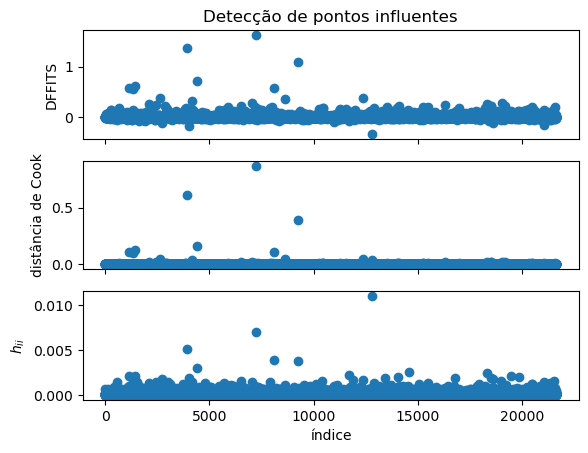

In [116]:
fig, (ax1, ax2, ax3) = plt.subplots(3)
ax1.scatter(df.index, dffits)
ax1.set_ylabel('DFFITS')
ax1.set_title('Detecção de pontos influentes')
#ax1.hlines(0,xmin=1,xmax=102,color='gray')

ax2.scatter(df.index, cook)
ax2.set_ylabel('distância de Cook')

ax3.scatter(df.index, hii)
ax3.set_ylabel('$h_{ii}$')
ax3.set_xlabel('índice')

for ax in fig.get_axes():
    ax.label_outer()

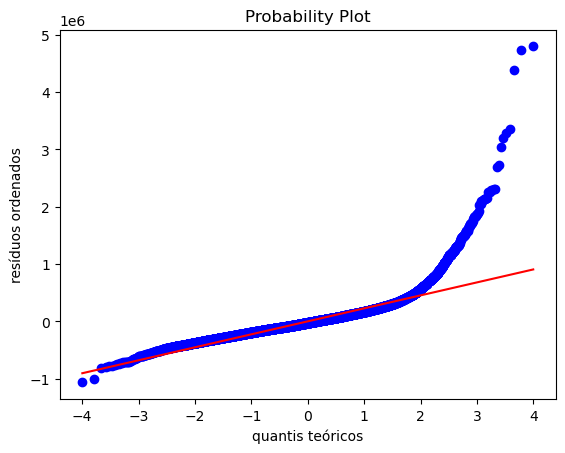

In [117]:
# Verificando a suposição de distribuição Normal dos resíduos
stats.probplot(residuo, plot=plt)
plt.xlabel('quantis teóricos')
plt.ylabel('resíduos ordenados')
plt.show()

Os resultados do seu modelo de regressão múltipla, após a seleção de recursos, indicam que o modelo explica cerca de 53.5% da variabilidade nos preços das casas. Isso é um aumento em relação ao modelo de regressão simples, sugerindo que as variáveis adicionais estão contribuindo para a previsão do preço da casa.

- `sqft_living`: Para cada aumento de uma unidade em `sqft_living`, o preço da casa aumenta em média em 184.4202 unidades monetárias, mantendo todas as outras variáveis constantes.

- `grade`: Para cada aumento de uma unidade, o preço da casa aumenta em média em 98.550 unidades monetárias, mantendo todas as outras variáveis constantes.

O intercepto do modelo é -598.100, o que seria o valor previsto para `price` quando todas as variáveis preditoras são 0.


Em relação à seleção de recursos, as duas variáveis mais importantes de acordo com a função `select_features` são `sqft_living` e `grade`, que são as incluídas no seu modelo. Essas variáveis têm os maiores escores de importância de recursos, indicando que elas têm a maior relação mútua com a variável de resposta `price`. Isso está de acordo com os resultados do  modelo de regressão, onde ambas as variáveis são significativas.

Agora, será aplciada uma trannsformação na variável dependente `price`, com o objetivo de melhorar a perfomance do modelo. 

##  Regressão Múltipla com Transformação de Box Cox na Variável Resposta

A Transformação de Box Cox inversa foi aplicada na variável ``price``, pois é uma técnica comumente usada para lidar com a heterocedasticidade em modelos de regressão, que foi observado nos modelos anteriores. A heterocedasticidade ocorre quando a variabilidade dos erros não é constante em todos os níveis da variável independente, o que viola uma das suposições fundamentais da regressão linear clássica. A técnica  busca estabilizar a variância dos resíduos, tornando-os mais homocedásticos. Quando aplicada à variável de resposta (``'price``), ela pode ajudar a melhorar a performance de modelos de regressão, como a regressão linear múltipla, ao tornar os dados mais conformes às suposições do modelo.


A transformação de Box-Cox é definida como:

$y($\lambda$)\ = \begin{cases} \frac{{y^\lambda - 1}}{\lambda}, & \text{se } \lambda \neq 0 \\ \log(y), & \text{se } \lambda = 0 \end{cases}$

onde \($ y $\) é a variável original e \($\lambda$\) é o parâmetro de transformação. No seu caso, parece que \($\lambda $\) é fixo em -0.234.

A ideia é escolher \($\lambda$\) de modo a maximizar a normalidade e homocedasticidade dos resíduos do modelo. A transformação inversa é então aplicada aos valores previstos pelo modelo para obter as estimativas finais.


In [118]:
df['price_transformado'] = (pow(df['price'],-0.234) - 1)/(-0.234)

In [119]:
modelo = ols('price_transformado ~ sqft_living + grade',data=df)
res = modelo.fit()


In [120]:
train_data,test_data = train_test_split(df,train_size = 0.8,random_state=3)

features = ['sqft_living','grade']
complex_model_3 = linear_model.LinearRegression()
complex_model_3.fit(train_data[features],train_data['price_transformado'])

print('Intercept: {}'.format(complex_model_3.intercept_))
print('Coefficients: {}'.format(complex_model_3.coef_))

pred = complex_model_3.predict(test_data[features])
rmsecm = float(format(np.sqrt(metrics.mean_squared_error(test_data['price_transformado'],pred)),'.3f'))
rtrcm = float(format(complex_model_3.score(train_data[features],train_data['price_transformado']),'.3f'))

artrcm = float(format(adjustedR2(complex_model_3.score(train_data[features],train_data['price_transformado']),train_data.shape[0],len(features)),'.3f'))
rtecm = float(format(complex_model_3.score(test_data[features],test_data['price_transformado']),'.3f'))
artecm = float(format(adjustedR2(complex_model_3.score(test_data[features],test_data['price_transformado']),test_data.shape[0],len(features)),'.3f'))
cv = float(format(cross_val_score(complex_model_3,df[features],df['price_transformado'],cv=5).mean(),'.3f'))

r = evaluation.shape[0]
evaluation.loc[r] = ['Multiple Regression-3','y transformer',rmsecm,rtrcm,artrcm,rtecm,artecm,cv]
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)

Intercept: 3.983363497915725
Coefficients: [9.44276780e-06 8.77959544e-03]


,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
1,Multiple Regression-1,All features,221680.867,0.602,0.602,0.617,0.616,0.601
2,Multiple Regression-2,selected features,242366.385,0.533,0.533,0.542,0.542,0.533
3,Multiple Regression-3,y transformer,0.017,0.527,0.527,0.538,0.538,0.528
0,Simple Linear Regression,-,254289.149,0.492,0.492,0.496,0.496,0.491


### Análise de resíduos 

In [121]:
# valores preditos de E(Y)
ypred=res.fittedvalues

# resíduo=observado-ajustado
residuo = res.resid

# objeto para a análise de pontos influentes
infl = res.get_influence()

# diagonal da matriz hat
hii = infl.hat_matrix_diag

# resíduo studentizado (internamente)
res_stud = infl.resid_studentized_internal

# resíduo studentizado com i-ésima observação deletada (externamente)
res_stud_del = infl.resid_studentized_external

# DFFITS
(dffits,p) = infl.dffits

# Distância de Cook
(cook,p) = infl.cooks_distance

In [122]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:     price_transformado   R-squared:                       0.529
Model:                            OLS   Adj. R-squared:                  0.529
Method:                 Least Squares   F-statistic:                 1.214e+04
Date:                Sun, 24 Dec 2023   Prob (F-statistic):               0.00
Time:                        18:56:03   Log-Likelihood:                 57598.
No. Observations:               21613   AIC:                        -1.152e+05
Df Residuals:                   21610   BIC:                        -1.152e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       3.9835      0.001   4455.258      

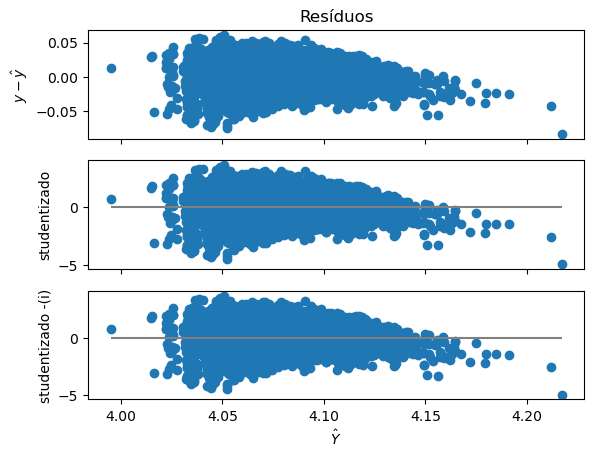

In [123]:
fig, (ax1, ax2, ax3) = plt.subplots(3)
ax1.scatter(ypred, residuo)
ax1.set_ylabel('$y-\hat{y}$')
ax1.set_title('Resíduos')
#ax1.hlines(0,xmin=min(ypred),xmax=max(ypred),color='gray')

ax2.scatter(ypred, res_stud)
ax2.set_ylabel('studentizado')
ax2.hlines(0,xmin=min(ypred),xmax=max(ypred),color='gray')

ax3.scatter(ypred, res_stud_del)
ax3.set_ylabel('studentizado -(i)')

ax3.hlines(0,xmin=min(ypred),xmax=max(ypred),color='gray')
ax3.set_xlabel('$\hat{Y}$')

for ax in fig.get_axes():
    ax.label_outer()


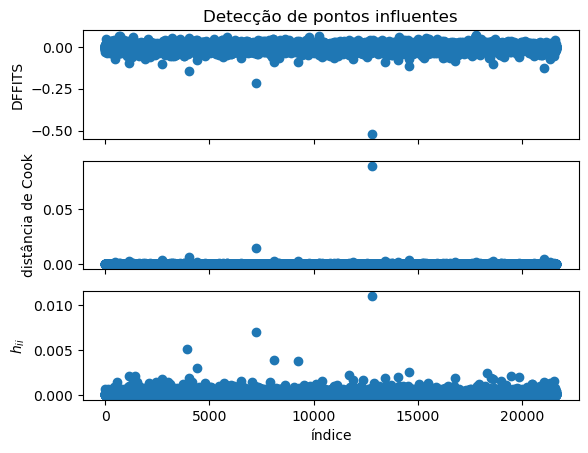

In [124]:
fig, (ax1, ax2, ax3) = plt.subplots(3)
ax1.scatter(df.index, dffits)
ax1.set_ylabel('DFFITS')
ax1.set_title('Detecção de pontos influentes')

#ax2.hlines(0,xmin=1,xmax=102,color='gray')
ax2.scatter(df.index, cook)
ax2.set_ylabel('distância de Cook')

ax3.scatter(df.index, hii)
ax3.set_ylabel('$h_{ii}$')
ax3.set_xlabel('índice')

for ax in fig.get_axes():
    ax.label_outer()

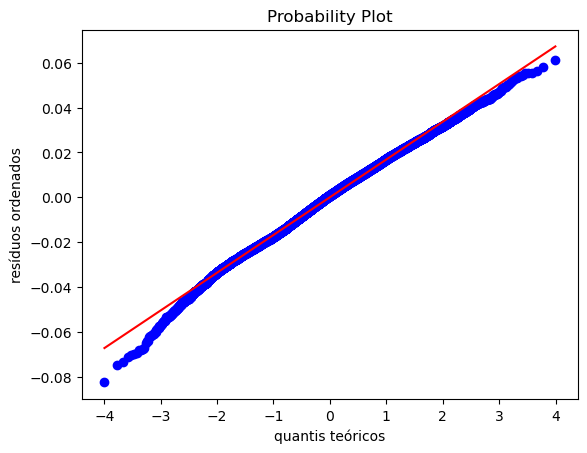

In [125]:
# Verificando a suposição de distribuição Normal dos resíduos
stats.probplot(residuo, plot=plt)
plt.xlabel('quantis teóricos')
plt.ylabel('resíduos ordenados')
plt.show()

Os resultados do seu modelo de regressão múltipla, após a transformação de Box-Cox inversa na variável `price`, indicam que o modelo explica cerca de 52.9% da variabilidade nos preços das casas.

- `sqft_living`: Para cada aumento de uma unidade em `sqft_living`, o `price_transformado` aumenta em média em 0.000009496 unidades, mantendo todas as outras variáveis constantes.

- `grade`: Para cada aumento de uma unidade na nota, o `price_transformado` aumenta em média em 0.0088 unidades, mantendo todas as outras variáveis constantes.

O intercepto do modelo é 3.9835, o que seria o valor previsto para `price_transformado` quando todas as variáveis preditoras são 0.


A transformação de Box-Cox é uma técnica eficaz para lidar com a heterocedasticidade e parece ter melhorado o desempenho do seu modelo. 

# Análise dos modelos de regressão


Considerando exclusivamente o RMSE (Root Mean Squared Error), o modelo que demonstrou o melhor desempenho foi o **Multiple Regression-3 (y transformer)**, que incorpora a transformação da variável `price` e as variáveis mais influentes, `sqft_living` e `grade`. Esse modelo apresentou o menor RMSE, alcançando 0.017. O RMSE mais baixo indica um erro médio de previsão menor, refletindo um ajuste mais preciso do modelo aos dados. No entanto, é crucial observar que esse modelo utiliza uma transformação na variável dependente (`price`), resultando em um RMSE em uma escala diferente em comparação com os outros modelos. Essa discrepância pode tornar a comparação direta do RMSE entre esse modelo e os demais potencialmente enganosa. Apesar disso, ao levar em consideração outras métricas, como o R-quadrado ou a validação cruzada, a diferença entre eles é mínima. 


# Técnicas de Regularização 

A Regressão Ridge e a Regressão Lasso são duas técnicas de regressão linear regularizada que foram desenvolvidas para lidar com problemas de multicolinearidade e para realizar a seleção de características.



### Regressão Lasso:

A Regressão Lasso, ou regularização L1, adiciona uma penalidade absoluta à função de custo da regressão linear ordinária. A função de custo da Regressão Lasso é dada por:

$ J(\beta) = \text{MSE} + \alpha \sum_{i=1}^{n} |\beta_i| $

Assim como na Regressão Ridge, $\alpha$ é o hiperparâmetro de regularização. A principal diferença entre Ridge e Lasso é a forma da penalidade. A penalidade $\alpha \sum_{i=1}^{n} |\beta_i| $ favorece a esparsidade nos coeficientes, o que significa que alguns coeficientes podem se tornar exatamente zero. Isso faz com que a Regressão Lasso seja útil para seleção de características, pois ela tende a eliminar variáveis irrelevantes.



### Regressão Ridge:

A Regressão Ridge, também conhecida como regressão Tikhonov ou regularização L2, adiciona uma penalidade quadrática à função de custo da regressão linear ordinária. A função de custo da Regressão Ridge é dada por:

$ J(\beta) = \text{MSE} + \alpha \sum_{i=1}^{n} \beta_i^2 $

onde:

- $J(\beta)$ é a função de custo,
- $\text{MSE}$ é o erro quadrático médio,
- $\alpha$ é o hiperparâmetro de regularização,
- $\beta_i$ são os coeficientes da regressão.

A penalidade $\alpha \sum_{i=1}^{n} \beta_i^2$ é adicionada à função de custo, onde $\alpha$ controla a força da penalidade. O objetivo da Regressão Ridge é minimizar a função de custo, levando em consideração a penalidade, o que resulta em coeficientes mais pequenos para as variáveis menos importantes.


### Comparação:  

- **Regressão Lasso:**
  - Lida bem com multicolinearidade e realiza seleção de características.
  - Tende a forçar alguns coeficientes a serem exatamente zero, tornando-se uma ferramenta de seleção de variáveis eficaz.
  
 - **Regressão Ridge:**
  - Lida bem com multicolinearidade.
  - Todos os coeficientes são penalizados, mas nenhum é eliminado.
  - Resulta em coeficientes menores, mas não necessariamente exatamente zero.




### Regressão Polinomial Regularizada com Lasso ou Ridge (Regularização L1 ou L2):

A Regressão Polinomial Regularizada combina a flexibilidade da Regressão Polinomial com a regularização da Regressão Ridge ou Lasso. Isso é particularmente útil quando se ajusta um modelo polinomial a dados, pois modelos polinomiais de grau elevado podem ser propensos a *overfitting*. 


#### Regressão Polinomial com L1


A Regressão Polinomial Regularizada com Lasso adiciona a penalidade de regularização L1 à função de custo da regressão polinomial. A função de custo é dada por:

$ J(\beta) = \text{MSE} + \alpha \sum_{i=1}^{n} |\beta_i| $

A penalidade $ \alpha \sum_{i=1}^{n} |\beta_i| $favorece a esparsidade nos coeficientes, o que significa que alguns coeficientes dos termos polinomiais de alta ordem podem se tornar exatamente zero. Isso torna a Regressão Polinomial Regularizada com Lasso útil para seleção automática de características e controle de overfitting.


#### Regressão Polinomial com L2

A Regressão Polinomial Regularizada com Ridge adiciona a penalidade de regularização L2 à função de custo da regressão polinomial. A função de custo é dada por:

$ J(\beta) = \text{MSE} + \alpha \sum_{i=1}^{n} \beta_i^2 $

onde:
- $ J(\beta) $ é a função de custo,
- $\text{MSE}$ é o erro quadrático médio,
- $\alpha$ é o hiperparâmetro de regularização,
- $\beta_i$ são os coeficientes da regressão polinomial.

Assim como na Regressão Ridge padrão, a penalidade $\alpha \sum_{i=1}^{n} \beta_i^2$ é adicionada à função de custo para evitar que os coeficientes se tornem muito grandes. Isso ajuda a controlar o overfitting, especialmente quando ajustamos modelos polinomiais complexos.


### Benefícios e Considerações:

- **Controle de Overfitting:** A regularização ajuda a evitar overfitting, especialmente quando o grau do polinômio é alto.
  
- **Seleção de Características:** A Regressão Polinomial Regularizada com Lasso pode realizar automaticamente a seleção de características, eliminando coeficientes não essenciais.

- **Ajuste Flexível:** Permite que o modelo ajuste polinômios complexos, mas com um controle mais rigoroso sobre a complexidade.



In [1]:
def adjustedR2(r2, n, k):
    return r2 - (k - 1) / (n - k) * (1 - r2)


In [126]:
train_data, test_data = train_test_split(df, train_size=0.8, random_state=3)

features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade']

alphas = [0.01, 0.1, 1.0]

degree = 2

evaluation = pd.DataFrame(columns=['Model', 'Features', 'RMSE', 'R² (Train)', 'Adj. R² (Train)', 'R² (Test)', 'Adj. R² (Test)', '5-Fold CV'])

# Ridge 
for alpha in alphas:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(train_data[features], train_data['price'])

    # Avaliação do modelo
    pred = ridge_model.predict(test_data[features])
    rmse = np.sqrt(metrics.mean_squared_error(test_data['price'], pred))
    r2_train = ridge_model.score(train_data[features], train_data['price'])
    adj_r2_train = adjustedR2(r2_train, train_data.shape[0], len(features))
    r2_test = ridge_model.score(test_data[features], test_data['price'])
    adj_r2_test = adjustedR2(r2_test, test_data.shape[0], len(features))
    cv_score = cross_val_score(ridge_model, df[features], df['price'], cv=5).mean()

    # Adicionar resultados ao DataFrame
    r = evaluation.shape[0]
    evaluation.loc[r] = [f'Ridge Regression (alpha={alpha})', 'All features', rmse, r2_train, adj_r2_train, r2_test, adj_r2_test, cv_score]

# Lasso 
for alpha in alphas:
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(train_data[features], train_data['price'])

    # Avaliação do modelo
    pred = lasso_model.predict(test_data[features])
    rmse = np.sqrt(metrics.mean_squared_error(test_data['price'], pred))
    r2_train = lasso_model.score(train_data[features], train_data['price'])
    adj_r2_train = adjustedR2(r2_train, train_data.shape[0], len(features))
    r2_test = lasso_model.score(test_data[features], test_data['price'])
    adj_r2_test = adjustedR2(r2_test, test_data.shape[0], len(features))
    cv_score = cross_val_score(lasso_model, df[features], df['price'], cv=5).mean()

    # Adicionar resultados ao DataFrame
    r = evaluation.shape[0]
    evaluation.loc[r] = [f'Lasso Regression (alpha={alpha})', 'All features', rmse, r2_train, adj_r2_train, r2_test, adj_r2_test, cv_score]

# Ridge com Regressão Polinomial
for alpha in alphas:
    ridge_model = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=alpha))
    ridge_model.fit(train_data[features], train_data['price'])

    # Avaliação do modelo
    pred = ridge_model.predict(test_data[features])
    rmse = np.sqrt(metrics.mean_squared_error(test_data['price'], pred))
    r2_train = ridge_model.score(train_data[features], train_data['price'])
    adj_r2_train = adjustedR2(r2_train, train_data.shape[0], len(features))
    r2_test = ridge_model.score(test_data[features], test_data['price'])
    adj_r2_test = adjustedR2(r2_test, test_data.shape[0], len(features))
    cv_score = cross_val_score(ridge_model, df[features], df['price'], cv=5).mean()

    # Adicionar resultados ao DataFrame
    r = evaluation.shape[0]
    evaluation.loc[r] = [f'Ridge Regression (alpha={alpha}, degree={degree})', 'All features', rmse, r2_train, adj_r2_train, r2_test, adj_r2_test, cv_score]

# Lasso com Regressão Polinomial
for alpha in alphas:
    lasso_model = make_pipeline(PolynomialFeatures(degree), Lasso(alpha=alpha))
    lasso_model.fit(train_data[features], train_data['price'])

    # Avaliação do modelo
    pred = lasso_model.predict(test_data[features])
    rmse = np.sqrt(metrics.mean_squared_error(test_data['price'], pred))
    r2_train = lasso_model.score(train_data[features], train_data['price'])
    adj_r2_train = adjustedR2(r2_train, train_data.shape[0], len(features))
    r2_test = lasso_model.score(test_data[features], test_data['price'])
    adj_r2_test = adjustedR2(r2_test, test_data.shape[0], len(features))
    cv_score = cross_val_score(lasso_model, df[features], df['price'], cv=5).mean()

    # Adicionar resultados ao DataFrame
    r = evaluation.shape[0]
    evaluation.loc[r] = [f'Lasso Regression (alpha={alpha}, degree={degree})', 'All features', rmse, r2_train, adj_r2_train, r2_test, adj_r2_test, cv_score]

# Exibir resultados
print(evaluation.sort_values(by='5-Fold CV', ascending=False))


                                      Model      Features           RMSE  \
8    Ridge Regression (alpha=1.0, degree=2)  All features  200985.700306   
7    Ridge Regression (alpha=0.1, degree=2)  All features  201026.555269   
6   Ridge Regression (alpha=0.01, degree=2)  All features  201032.477397   
11   Lasso Regression (alpha=1.0, degree=2)  All features  201229.300026   
10   Lasso Regression (alpha=0.1, degree=2)  All features  201236.955711   
9   Lasso Regression (alpha=0.01, degree=2)  All features  201237.730720   
2              Ridge Regression (alpha=1.0)  All features  221704.122826   
1              Ridge Regression (alpha=0.1)  All features  221683.182697   
5              Lasso Regression (alpha=1.0)  All features  221681.537763   
0             Ridge Regression (alpha=0.01)  All features  221681.098198   
4              Lasso Regression (alpha=0.1)  All features  221680.933774   
3             Lasso Regression (alpha=0.01)  All features  221680.873405   

    R² (Tra

Ao analisar os resultados dos modelos Ridge, Lasso e Regressão Polinomial Regularizada, observa-se algumas tendências:

### Modelos Ridge:

1. **Desempenho Geral:**
   - Os modelos Ridge apresentam desempenho relativamente consistente em termos de RMSE, R² (treino e teste), e R² ajustado.

2. **Impacto do Hiperparâmetro $\alpha$:**
   - À medida que o hiperparâmetro $\alpha$ aumenta, os coeficientes são mais penalizados, levando a uma redução nos valores dos coeficientes e, portanto, a uma simplificação do modelo.

3. **Comparação com Regressão Linear Simples:**
   - Os modelos Ridge superam a regressão linear simples em termos de R² (treino e teste) e R² ajustado.

### Modelos Lasso:

1. **Desempenho Geral:**
   - Os modelos Lasso também apresentam desempenho consistente em termos de RMSE, R² (treino e teste), e R² ajustado.

2. **Esparsidade nos Coeficientes:**
   - A Regressão Lasso tem a capacidade de zerar alguns coeficientes, levando à esparsidade no modelo. Isso é evidenciado pelos valores ligeiramente mais baixos de R² (treino e teste) em comparação com Ridge.

### Modelos Polinomiais Regularizados (Ridge e Lasso):

1. **Desempenho em Dados Polinomiais:**
   - O uso de termos polinomiais (degree=2) não resulta em uma melhora significativa em comparação com modelos lineares para as métricas consideradas.

2. **Impacto da Regularização:**
   - A regularização ajuda a controlar o *overfitting* em modelos polinomiais, evidenciado pelo desempenho relativamente consistente entre diferentes valores de $\alpha$.

3. **Seleção de Características (Lasso):**
   - A Regressão Polinomial Regularizada com Lasso pode resultar em alguns coeficientes exatamente zerados, indicando seleção de características.

### Considerações Gerais:

1. **Trade-off entre Viés e Variância:**
   - Modelos Ridge tendem a reduzir a variância, enquanto modelos Lasso introduzem um trade-off entre viés e variância, favorecendo a esparsidade.

2. **Escolha do Modelo:**
   - A escolha entre Ridge e Lasso dependerá das preferências em termos de esparsidade nos coeficientes. Se a interpretabilidade é crucial e a seleção de características é desejada, Lasso pode ser preferível.

3. **Ajuste Fino de Hiperparâmetros:**
   - A escolha apropriada dos hiperparâmetros $\alpha$, grau do polinômio) é crucial. Pode ser necessário ajuste fino para otimizar o desempenho do modelo.

4. **Comparação com Regressão Linear Simples:**
   - Todos os modelos, incluindo a regressão linear simples, mostram um desempenho relativamente semelhante nos dados avaliados.

Os resultados indicam que modelos regularizados (Ridge e Lasso) são úteis para controlar a complexidade do modelo e melhorar a generalização em comparação com modelos lineares simples, especialmente quando há multicolinearidade ou overfitting.

# ----------------------------------------------------------------
# Conclusão Geral
# ----------------------------------------------------------------

Ao comparar os resultados, nota-se diferenças significativas entre os modelos. Os modelos de Regressão Simples e Múltipla (Multiple Regression-1 e Multiple Regression-2) exibem valores de RMSE mais altos em comparação com os modelos de Regressão Regularizada (Ridge e Lasso). Por outro lado, os modelos de Regressão Múltipla também apresentam pontuações de 5-Fold Cross Validation mais baixas em comparação com os modelos de Regressão Regularizada. Especificamente, os modelos Ridge e Lasso geralmente mostram R² (treino e teste) e R² ajustado mais altos do que os modelos de Regressão Múltipla.

Foi obervado que o modelo de Regressão Múltipla com a transformação de Box-Cox na variável resposta obteve o melhor desempenho global. Logo, a variável resposta (`price_transformado`) é modelada em relação às variáveis preditoras (`sqft_living` e `grade`). 

Com o modelo tem a seguinte forma:

$ \text{price_transformado} = 3.9836514666386345 + 9.49390021 \times 10^{-6} \times \text{sqft_living} + 0.00873351294 \times \text{grade} $





# ---------------------------------------------------------------------------------
# Possíveis estratégias para melhorar os resultados
# ---------------------------------------------------------------------------------

1. **Exploração de Outros Hiperparâmetros:**
   - Além dos hiperparâmetros $\alpha$ (para Ridge e Lasso) e o grau do polinômio, explorar outros hiperparâmetros que possam impactar o desempenho, como taxas de aprendizado, número de iterações.
   
   
2. **Feature Engineering:**
   - Considerar a criação de novas features que possam capturar melhor a complexidade dos dados. Isso pode envolver transformações, combinações ou extração de características relevantes.


3. **Ridge - Pesquisa de $\alpha$ otimizada:**
   - Realizar uma pesquisa mais detalhada para encontrar o valor de $\alpha$ que otimiza o desempenho. Considerar técnicas como busca em grade ou aleatória.


4. **Lasso - Ajuste da Sensibilidade à Esparsidade:**
   - Variar a sensibilidade à esparsidade ajustando o hiperparâmetro $\alpha$ para encontrar um equilíbrio adequado entre esparsidade e desempenho preditivo.


5. **Exploração de Graus Polinomiais Mais Altos:**
   - Além do grau 2, experimentar graus polinomiais mais altos para capturar padrões mais complexos nos dados.

6. **Combinação de Ridge e Lasso em Modelos Polinomiais:**
   - Considere a combinação de Ridge e Lasso em modelos polinomiais para aproveitar os benefícios de ambas as técnicas.



Ao implementar essas estratégias e outras, atlvez aprimore ainda mais o desempenho e a generalização dos modelos. 

# ---------------------------------------------------------------------
# Referências
# ---------------------------------------------------------------------

**Dataset**
1. O banco de dados utilizado neste trabalho está disponível em: https://www.kaggle.com/datasets/harlfoxem/housesalesprediction
        
**Livros**

1. James, G., Witten, D., Hastie, T., Tibshirani, R., & Taylor, J. (2023). An Introduction to Statistical Learning with Applications in Python. Springer. Disponível em: https://www.statlearning.com/


2. Faceli, K., Lorena, A. C., Gama, J., & Carvalho, A. C. P. de L. F. (2011). Inteligência Artificial: Uma Abordagem de Aprendizado de Máquina. Grupo Gen - LTC. 
